In [ ]:
# Entanglement scaling in MERA systems

## Exact ground state energy including finite-size corrections

In [ ]:
EnAPBC=[-1.270005811417927, -1.2724314193572888, -1.2730375326245706, -1.273189042909428, -1.2732269193538452, -1.2732363883945284];
EnPBC_exact_diag=[-1.2797267740319183, -1.2748570272966502, -1.273643645891852, -1.273340553194287, -1.2732647957982595, -1.273245857435202, -1.273241122906045, -1.273239939277603];
Ecorr = map( (x)-> (x+(4/pi)), EnPBC_exact_diag);
#coeff = map( (a,b) -> (b*(2^(2*a))), enumerate(Ecorr))

In [ ]:
for (a,b) in enumerate(Ecorr)
    println(b*(81*2^(2*(a-1))))
end
println("--------------------")
pi/6

In [ ]:
function approximate_energy_persite(nsites)
    # including only the leading finite-size correction
    return ( -4/pi - (pi/6)/(nsites*nsites) )
end

EnPBC_approx_9_15 = map(approximate_energy_persite,81*4.^collect(9:15))
EnPBC=[EnPBC_exact_diag...,EnPBC_approx_9_15...]
println("--------------------")
println(-4/pi)

# Plotting entanglement of threesite reduced density matrices at each scale

In [ ]:
using JLD

In [ ]:
typealias Float Float64
cd("/home/siva/towards_MERA/mera/")
include("IsingHam.jl")
include("BinaryMERA.jl")
include("OptimizeMERA.jl")

### Prediction for entanglement per layer

As the MERA approache scale invariance, we expect the entanglement of 3 sites to be $\frac{c}{3}\log(8\times8\times8)$ or rather $\frac{c}{3}\log(5\times5\times5)$. I would imagine that something like thos follows from scale invariance.
$$S(L) = \frac{c}{3} \; \log \left(\frac{L}{a} \right)$$

1. Why should the "length of the interval" correspond to the dimension of its Hilbert space? Would this be some argument based on quantization, the number of modes in a box is equal to the ratio of the IR cutoff to the UV cutoff?

2. But then, would we not expect equal contribution to entanglement "per scale" where we expect one mode per scale (in some sensible normalization)

In [ ]:
@show (0.5/3)*log2(5*5*5*2);
@show (0.5/3)*log2(8*8*8*2);
#@show (0.5/3)*log(5*5*5)

### The plots

In [2]:
typealias Float Float64
using Plots
pyplot()
cd("/home/siva/towards_MERA/mera/")
include("IsingHam.jl")
include("BinaryMERA.jl")
include("OptimizeMERA.jl")
include("MakePlots.jl")

animatedplot (generic function with 1 method)

In [ ]:
listrhoslist = load("rhoslist_snapshots_7layers_newsweep.jld");

In [ ]:
cd("/home/siva/towards_MERA/mera/mp2-run13")
pwd()

animatedplot("foo.gif";n_start=5,n_stop=8)

In [ ]:
Plots.Animated("/home/siva/towards_MERA/mera/mp2-run13/foo.gif")

In [4]:
m7=load("solutionMERA_7layers_(8,5,5,5,5,5,5,5)shape_newsweep.jld","m_7layers");

In [5]:
rlist=buildReverseRhosList(m7) |> reverse ;

[Plots.jl] Initializing backend: pyplot


INFO: Recompiling stale cache file /home/siva/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/siva/.julia/lib/v0.4/BinDeps.ji for module BinDeps.
INFO: Recompiling stale cache file /home/siva/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/siva/.julia/lib/v0.4/Conda.ji for module Conda.



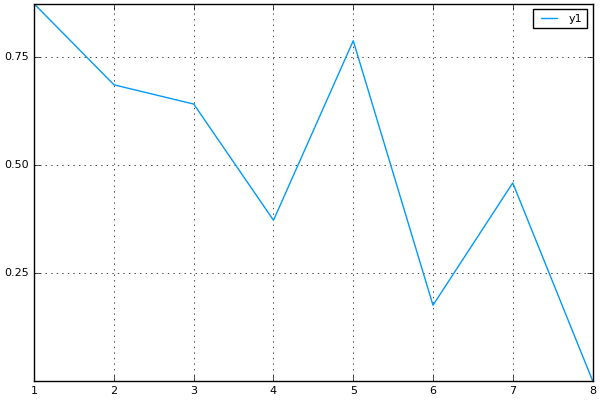

In [6]:
plot(rlist |> getEntList)

# Testing overwrites of save() and jldopen()

In [ ]:
cd("../")
pwd()

In [ ]:
jldopen("testfile.jld","w") do file
    write(file,"a",1)
    write(file,"b",2)
end
jldopen("testfile.jld","r+") do file
    write(file,"c",3)
    write(file,"d",4)
end

In [ ]:
load("testfile.jld")

In [ ]:
save("testfile.jld","b",2)

In [ ]:
const ln = 3;
immutable rhi
    elem::Array{Float64,6}
end
t = Array{Array{rhi}(ln)}

In [ ]:
x = Array{Float64,5}

In [ ]:
y = Array{Float64}(5)

In [ ]:
t = Array{Float64}